# Split Y Axis plots
**Scott Wales, CLEX CMS**

Making plots where the top and bottom halves have different y axis ranges

In [1]:
import xarray
import numpy
import pandas
import matplotlib
import matplotlib.pyplot as plt

## Sample data

In [2]:
da = xarray.DataArray(numpy.random.random((10,10)),
                     coords=[
                         ('time', pandas.date_range('20010101', periods=10, freq='D')),
                         ('depth', numpy.logspace(0,4,num=10)),
                     ])

## Single plot

First work out what options we need to plot with - here we want depth to descend along the y axis, so we need `yincrease=False`

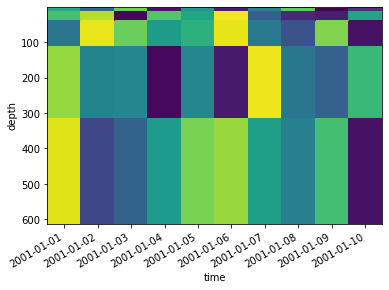

In [3]:
da.sel(depth=slice(0,500)).plot.pcolormesh('time','depth',yincrease=False,add_colorbar=False)

## Two depth ranges

We'll plot the upper and lower depth ranges as two separate subplots, then adjust the margins so it looks like a single plot.

I'm demonstrating with `GridSpec` as it's more flexible than `plt.subplot` and allows for easier margin adustments, but this would work with either

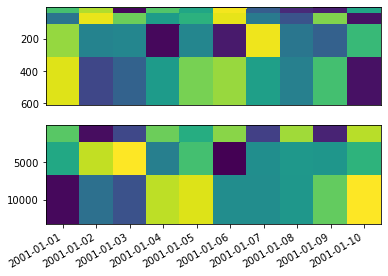

In [4]:
gs = matplotlib.gridspec.GridSpec(2, 1)

# Top subplot
ax = plt.subplot(gs[0,0])
da.sel(depth=slice(0,500)).plot.pcolormesh('time','depth',yincrease=False,
                                           add_colorbar=False, ax=ax, add_labels=False)
ax.tick_params(axis='x', bottom=False, labelbottom=False)

# Bottom subplot
ax = plt.subplot(gs[1,0])
da.sel(depth=slice(500,None)).plot.pcolormesh('time','depth',yincrease=False,
                                              add_colorbar=False, ax=ax, add_labels=False)

## Turning it into a function

To make this simpler to use I've made it into a function, that takes the data, the top and bottom axes and the depth to split at. You could extend this function to also add a title, colour bar etc.

In [5]:
def split_depth_plot(da, ax_top, ax_bottom, depth):
    # Make sure the colour range is the same for the top and bottom plots
    vmin = da.min()
    vmax = da.max()
    
    # Plot the top half
    da.sel(depth=slice(0,depth)).plot.pcolormesh('time','depth',yincrease=False,vmin=vmin, vmax=vmax,
                                                 add_colorbar=False, ax=ax_top, add_labels=False)
    
    # Remove x axis labels from the top
    ax_top.tick_params(axis='x', bottom=False, labelbottom=False)
    
    # Plot the bottom half
    da.sel(depth=slice(depth,None)).plot.pcolormesh('time','depth',yincrease=False, vmin=vmin, vmax=vmax,
                                                    add_colorbar=False, ax=ax_bottom, add_labels=False)

## Multiple plots

Using the function it's simple to plot multiple times, say for different datasets

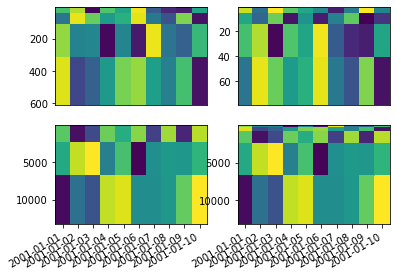

In [6]:
# 2 rows, 2 columns
gs = matplotlib.gridspec.GridSpec(2, 2)

split_depth_plot(da, plt.subplot(gs[0,0]), plt.subplot(gs[1,0]), depth=500)

split_depth_plot(da, plt.subplot(gs[0,1]), plt.subplot(gs[1,1]), depth=100)

## Joining top and bottom

GridSpec makes it easy to remove the margin between the top and bottom halves, making a complete plot

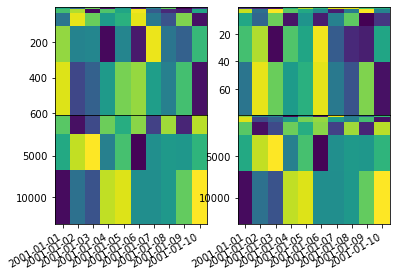

In [7]:
# 2 rows, 2 columns with no margin
gs = matplotlib.gridspec.GridSpec(2, 2, hspace=0)

split_depth_plot(da, plt.subplot(gs[0,0]), plt.subplot(gs[1,0]), depth=500)

split_depth_plot(da, plt.subplot(gs[0,1]), plt.subplot(gs[1,1]), depth=100)